In [180]:
import pandas as pd
import numpy as np
import datetime 
from scipy.stats import norm
import math
from matplotlib import pyplot as plt
csv_path = r"C:/Users/edgil/Documents/Masters/dissertation/data/eurusd_hour.csv"

In [181]:
eurusd = pd.read_csv(csv_path)
eurusd['date'] = pd.to_datetime(eurusd['Date'])

In [182]:
eurusd.columns

Index(['Date', 'Hour', 'BidOpen', 'BidHigh', 'BidLow', 'BidClose', 'BidChange',
       'AskOpen', 'AskHigh', 'AskLow', 'AskClose', 'AskChange', 'date'],
      dtype='object')

In [183]:
#Make the neccessary transforms on the data.
eurusd.columns
eurusd['MidOpen'] = (eurusd['BidOpen'] + eurusd['AskOpen'])/2
eurusd['MidClose'] = (eurusd['BidClose'] + eurusd['AskClose'])/2
eurusd['MidClose_pct_chg'] = eurusd['MidClose'].pct_change()
eurusd["bid_offer"] = eurusd['BidClose'] + eurusd['AskClose']
daily_0800 = eurusd.loc[eurusd['Hour'] == "08:00"]
daily_0800['MidClose_pct_chg'] = daily_0800['MidClose'].pct_change()
daily_1600 = eurusd.loc[eurusd['Hour'] == "16:00"]
daily_1600['MidClose_pct_chg'] = daily_1600['MidClose'].pct_change()
(mu, sigma) = norm.fit(daily_0800['MidClose_pct_chg'].dropna(how='all'))
daily_0800['MidClose_pct_chg'] = daily_0800['MidClose_pct_chg'].replace(np.nan, 0)
daily_1600['MidClose_pct_chg'] = daily_1600['MidClose_pct_chg'].replace(np.nan, 0)

C:\Users\edgil\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\edgil\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\edgil\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [13]:
# this reverses the dataframe and provides you with forward returns
eurusd['MidClose_24h_fwd'] = eurusd['MidClose_pct_chg'].iloc[::-1].rolling(24).sum().iloc[::-1]
eurusd['MidClose_24h_fwd_sign'] = eurusd['MidClose_24h_fwd'].apply(np.sign)
eurusd['MidClose_24h_prior'] = eurusd['MidClose_pct_chg'].rolling(24).sum()
eurusd['MidClose_12h_prior'] = eurusd['MidClose_pct_chg'].rolling(12).sum()
eurusd['MidClose_24h_fwd'] = eurusd['MidClose_24h_fwd'].replace(np.nan, 0)
eurusd['MidClose_24h_fwd_sign'] = eurusd['MidClose_24h_fwd_sign'].replace(np.nan, 0)
eurusd['MidClose_24h_prior'] = eurusd['MidClose_24h_prior'].replace(np.nan, 0)
eurusd['MidClose_12h_prior'] = eurusd['MidClose_12h_prior'].replace(np.nan, 0)

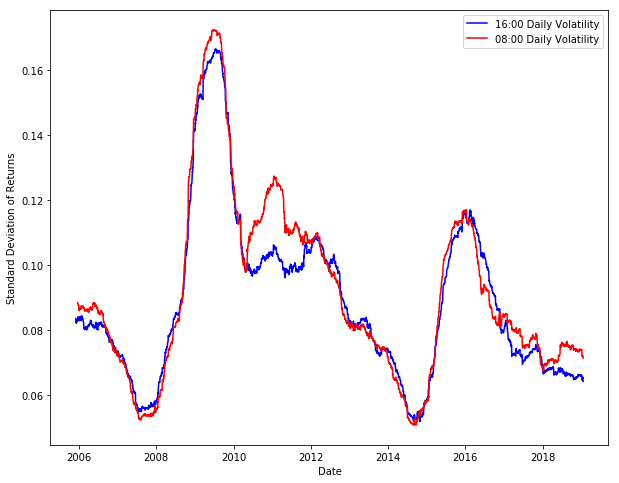

In [185]:
rolling_sd_1600 = daily_1600['MidClose_pct_chg'].rolling(252).std()*math.sqrt(252)
rolling_sd_0800 = daily_0800['MidClose_pct_chg'].rolling(252).std()*math.sqrt(252)
fig = plt.figure(1,figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot(pd.to_datetime(daily_1600['Date'].iloc[252:]),rolling_sd_1600.iloc[252:], c = "b")
ax.plot(pd.to_datetime(daily_0800['Date'].iloc[252:]),rolling_sd_0800.iloc[252:], c = "r")
ax.set_xlabel("Date")
ax.set_ylabel("Standard Deviation of Returns")
ax.legend(['16:00 Daily Volatility', '08:00 Daily Volatility'])
plt.show()
ax.get_figure().savefig("C:/Users/edgil/Documents/Masters/dissertation/document/images/EURUSDRollingVol.png")

In [179]:
rolling_sd_1600

862           NaN
886           NaN
910           NaN
934           NaN
958           NaN
986           NaN
1010          NaN
1034          NaN
1058          NaN
1082          NaN
1110          NaN
1134          NaN
1158          NaN
1182          NaN
1206          NaN
1235          NaN
1259          NaN
1283          NaN
1307          NaN
1331          NaN
1359          NaN
1383          NaN
1407          NaN
1431          NaN
1455          NaN
1484          NaN
1508          NaN
1532          NaN
1556          NaN
1580          NaN
           ...   
89532    0.066015
89556    0.066035
89580    0.066055
89604    0.066038
89628    0.066178
89652    0.066123
89676    0.066120
89700    0.066261
89724    0.066317
89748    0.066275
89772    0.066366
89796    0.066095
89820    0.066093
89844    0.066101
89866    0.066036
89890    0.066078
89914    0.065876
89936    0.066278
89960    0.066307
89984    0.065987
90008    0.065692
90032    0.064718
90056    0.065114
90080    0.065107
90104    0

In [128]:
x = daily_1600['MidClose_pct_chg']/(daily_1600['MidClose_pct_chg'].rolling(252).std())
STDEV = 5
x = x.replace(np.nan,0)
cummysum = 0
storage = []
num_days = 0
days = []
for el in list(abs(x.values)):
    num_days += 1
    cummysum += el
    if cummysum >= STDEV:
        storage.append(cummysum)
        days.append(num_days)
        cummysum = 0
        num_days = 0
    else:
        storage.append(np.nan)
        days.append(np.nan)
    
stry = pd.DataFrame({"MoveSize": storage, "Days": days})

In [161]:
# trump graph ['MidClose']
election1 = pd.to_datetime(eurusd['Date']) >= datetime.datetime.strptime("08/11/2016","%d/%m/%Y")
election2 = pd.to_datetime((eurusd['Date'])) <= datetime.datetime.strptime("10/11/2016","%d/%m/%Y")
election_px = eurusd[['Date','MidClose','Hour']].loc[(election1 == True) & (election2 == True)]
election_px['date'] = pd.to_datetime(election_px['Date'])

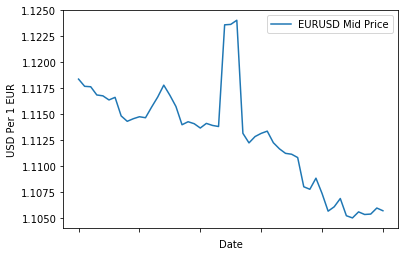

In [167]:
fig = plt.figure(1, figsize=(16, 16))

eur_plt = election_px.plot(x= "Hour", y = "MidClose", label = "EURUSD Mid Price")
eur_plt.set_xlabel("Date")
eur_plt.set_ylabel("USD Per 1 EUR")
eur_plt.get_figure().savefig("C:/Users/edgil/Documents/Masters/dissertation/document/images/ElectionNight.png")

In [129]:
# print(stry["Days"].loc[daily_1600['Date'] < ="01/01/2008"])
import datetime
booleans2008 = pd.to_datetime(daily_1600['Date']) <= datetime.datetime.strptime("01/01/2008","%d/%m/%Y")
booleans2010 = pd.to_datetime(daily_1600['Date']) >= datetime.datetime.strptime("01/01/2011","%d/%m/%Y")
print(len(booleans2008))
print(len(booleans2010))
print(len(stry))
df2008 = stry['Days'].loc[booleans2008.values]
df2010 = stry['Days'].loc[booleans2010.values]

3699
3699
3699


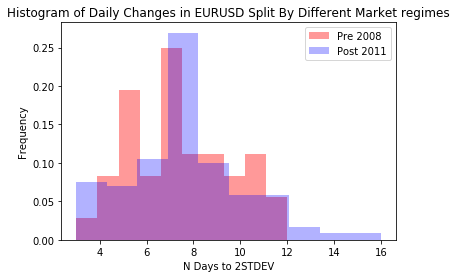

In [131]:
n, bins, patches = plt.hist(df2008.iloc[500:].loc[df2008 > 0], normed=True, bins=10,color = "r",alpha = 0.4)
n, bins, patches = plt.hist(df2010.loc[df2010 > 0], normed=True, bins=10,color = "b",alpha= 0.3)
plt.xlabel('N Days to 2STDEV')
plt.ylabel('Frequency')
plt.title(r'Histogram of Daily Changes in EURUSD Split By Different Market regimes')
plt.legend(['Pre 2008',"Post 2011"])
plt.show()
#plt.savefig("C:/Users/edgil/Documents/Masters/dissertation/document/images/TrendSpeedHIst.png")

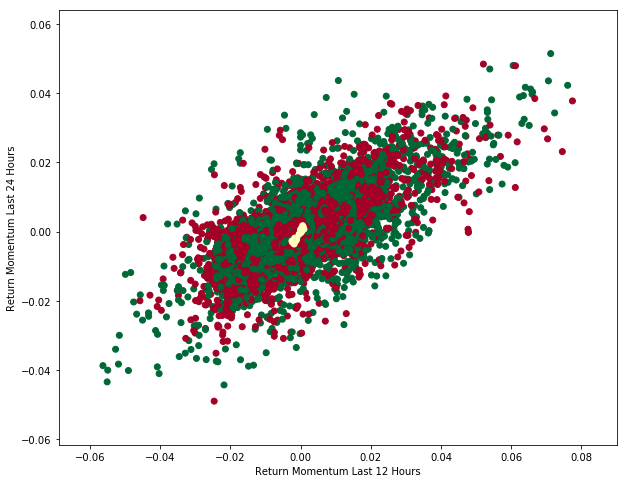

In [8]:
fig = plt.figure(1,figsize=(10,8))
ax = fig.add_subplot(111)
ax.scatter(eurusd['MidClose_24h_prior'].iloc[:-1], eurusd['MidClose_12h_prior'].iloc[:-1], cmap="RdYlGn", c = eurusd['MidClose_24h_fwd_sign'].loc[1:])
ax.set_xlabel("Return Momentum Last 12 Hours")
ax.set_ylabel("Return Momentum Last 24 Hours")
plt.show()
ax.get_figure().savefig("C:/Users/edgil/Documents/Masters/dissertation/document/images/EURUSDMomentum.png")

In [31]:
daily_0800.loc[(daily_0800['Date'] >= "2005-06-01") & (daily_0800['Date'] <= "2008-06-01"),"MidClose_pct_chg"]
daily_0800.loc[daily_0800['Date'] >= "2014-06-01","MidClose_pct_chg"].std()

0.005330358735061744

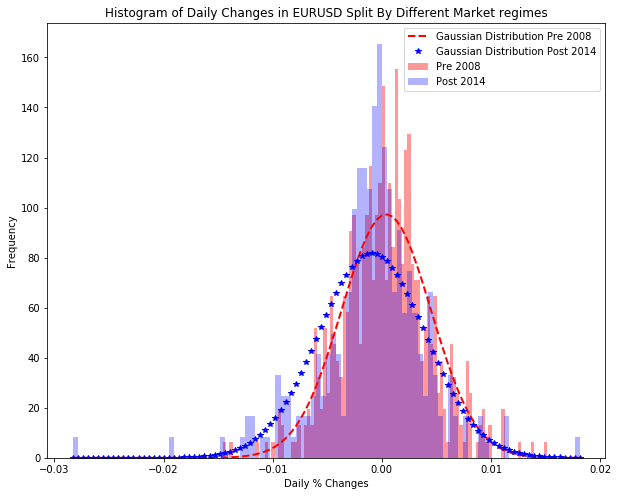

In [50]:
import matplotlib.mlab as mlab
#bins = 100
mu_08 = daily_0800.loc[(daily_0800['Date'] >= "2006-02-01") & (daily_0800['Date'] <= "2008-02-01"),"MidClose_pct_chg"].mean()
sd_08 = daily_0800.loc[(daily_0800['Date'] >= "2006-02-01") & (daily_0800['Date'] <= "2008-02-01"),"MidClose_pct_chg"].std()
mu_14 = daily_0800.loc[(daily_0800['Date'] >= "2014-04-01") & (daily_0800['Date'] <= "2015-04-01"),"MidClose_pct_chg"].mean()
sd_14 = daily_0800.loc[(daily_0800['Date'] >= "2014-04-01") & (daily_0800['Date'] <= "2015-04-01"),"MidClose_pct_chg"].std()
plt.figure(1, figsize=(10, 8))
n, bins, patches = plt.hist(daily_0800.loc[(daily_0800['Date'] >= "2006-02-01") & (daily_0800['Date'] <= "2008-02-01"),"MidClose_pct_chg"], 
                            normed=True, bins=100,color = "r",alpha = 0.4)
n, bins, patches = plt.hist(daily_0800.loc[(daily_0800['Date'] >= "2014-04-01") & (daily_0800['Date'] <= "2015-04-01"),"MidClose_pct_chg"], 
                            normed=True, bins=100,color = "b",alpha= 0.3)
dist_08 = mlab.normpdf( bins, mu_08, sd_08)
dist_14 = mlab.normpdf( bins, mu_14, sd_14)
l08 = plt.plot(bins, dist_08, 'r--', linewidth=2)
l14 = plt.plot(bins, dist_14, 'b*', linewidth=2)
plt.xlabel('Daily % Changes')
plt.ylabel('Frequency')
plt.title(r'Histogram of Daily Changes in EURUSD Split By Different Market regimes')
plt.legend(['Gaussian Distribution Pre 2008',"Gaussian Distribution Post 2014" ,"Pre 2008", "Post 2014"])
plt.savefig("C:/Users/edgil/Documents/Masters/dissertation/document/images/Regimehist.png")

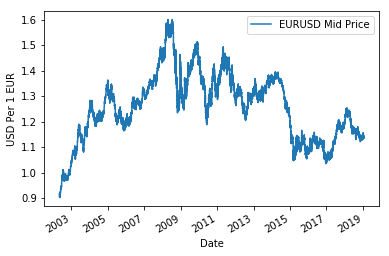

In [18]:
fig = plt.figure(1, figsize=(16, 16))
eur_plt = eurusd.plot(x= "date", y = "MidClose", label = "EURUSD Mid Price")
eur_plt.set_xlabel("Date")
eur_plt.set_ylabel("USD Per 1 EUR")
eur_plt.get_figure().savefig("C:/Users/edgil/Documents/Masters/dissertation/document/images/EURUSDPrice.png")

In [21]:
x = eurusd.loc[eurusd['date'] <= "1/1/2010"]
x['Date'].tail()

33009    2009-12-31
33010    2009-12-31
33011    2009-12-31
33012    2009-12-31
33013    2009-12-31
Name: Date, dtype: object

C:\Users\edgil\AppData\Local\Programs\Python\Python36\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
C:\Users\edgil\AppData\Local\Programs\Python\Python36\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\edgil\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\cbook\__init__.py:1856: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\Users\edgil\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\cbook\__init__.py:1863: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\Users\edgil\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\cbook\__init__.py:1871: RuntimeWarning: invalid value en

{'whiskers': [<matplotlib.lines.Line2D at 0xadd1130>,
 'caps': [<matplotlib.lines.Line2D at 0xacaa7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0xadd1090>,
 'medians': [<matplotlib.lines.Line2D at 0xacaa4d0>,
 'fliers': [<matplotlib.lines.Line2D at 0xacaa350>,
 'means': []}

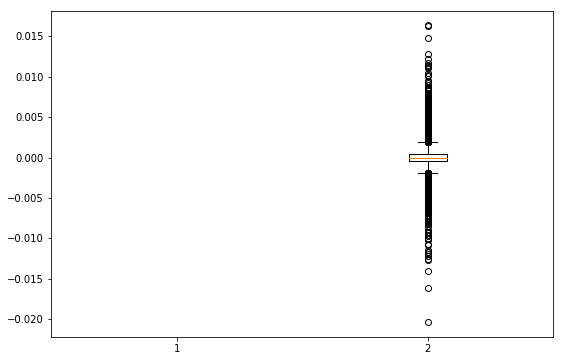

In [37]:
# create the code to display box plots of each year, in terms of volatility, you need to create timesereis return
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
eurusd['bidClose_pct_chg'] = eurusd.BidClose.pct_change()
#eurusd[eurusd['date'] <= "1/1/2010"].boxplot("bidClose_pct_chg")
#eurusd[eurusd['date'] > "1/1/2010"].boxplot("bidClose_pct_chg")
plt.boxplot([1, eurusd.loc[eurusd['date'] > "1/1/2010"]['bidClose_pct_chg']])
x = eurusd.loc[eurusd['date'] <= "1/1/2010"]['bidClose_pct_chg']